# Getting Started with Foundation Models
copyright 2023 Denis Rothman, MIT License

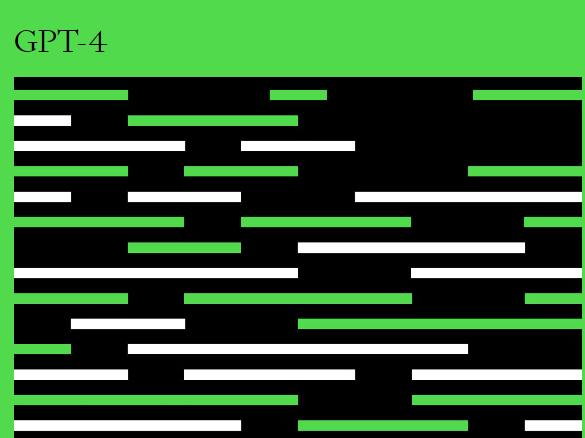

This notebook explores GPT-3, GPT-3.5 turbo(ChatGPT) and GPT-4 models. Each model is implemented for each task. Which one should you choose for your project? 

Let's ask GPT-4 to guide us through this challenging question.

**Denis Rothman:**What do you really need for NLP tasks: GPT-3, GPT-3.5-turbo, or GPT-4? 

**GPT-4** The choice between GPT-3, GPT-3.5-turbo, and GPT-4 for NLP tasks depends on your specific requirements, such as the level of complexity, budget, and the desired balance between response time and accuracy. Here's a general guideline for choosing between these models:

GPT-3: This model provides a good balance of capability, cost, and response time. If your NLP tasks are moderately complex and you are looking for an affordable option that delivers reliable performance, GPT-3 engines like Curie or Babbage can be suitable.

GPT-3.5-turbo: Designed to offer similar capabilities as GPT-3's Davinci engine but at a lower cost per token, GPT-3.5-turbo can be a suitable choice if you want a powerful engine with a more cost-effective approach. Use it for tasks that require more creativity and nuanced understanding without breaking the bank.

GPT-4: As the most advanced model in this series, GPT-4 can be the best choice for highly complex NLP tasks that demand superior performance, understanding, and creativity. If you are working on cutting-edge applications or need a top-tier language model for research, GPT-4 may be the right choice. However, keep in mind that GPT-4 could be more expensive and have slower response times compared to the other options.

Ultimately, the choice depends on your project's specific requirements, budget, and the desired trade-offs between performance and cost. It can be helpful to experiment with different models and engines to find the one that best fits your needs.












What do you really need for NLP tasks: GPT-3, GPT-3.5-turbo, or GPT-4? Run each task in the notebook to decide.


##  Installing & importing Openai

In [1]:
try:
  import openai
except:
  !pip install openai
  import openai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.1/70.1 KB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 2.0 MB/s eta 0:00:00


##  Entering the API KEY

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
f = open("drive/MyDrive/files/api_key.txt", "r")
API_KEY=f.readline()
f.close()

In [4]:
#The OpenAI Key
import os
os.environ['OPENAI_API_KEY'] =API_KEY
openai.api_key = os.getenv("OPENAI_API_KEY")

#Engines

### List of Engines

[OpenAI models](https://platform.openai.com/docs/models/overview) include engines. 

What is the difference between OpenAI models and engines?

**Denis Rothman:** OpenAI has several models such as GPT-3, GPT-3.5-turbo, and GPT-4. OpenAI also has several engines. What is the difference between the models and the engines?

**GPT-4:** OpenAI's models refer to different versions or iterations of their language models, each with distinct capabilities, complexity, and performance. GPT-3, GPT-3.5-turbo, and GPT-4 are examples of different models, with GPT-4 being the most advanced version in the series you mentioned.

On the other hand, engines are specific configurations or instances of a given model, tailored to provide different levels of performance, cost, and use cases. Each engine has a different balance of capabilities, such as response time, token limits, and creative output.

To clarify, let's consider GPT-3 as an example. GPT-3 has several engines associated with it, including:

Davinci: The most capable and creative engine, suitable for complex tasks but with a higher cost per token and slower response time.
Curie: A more balanced engine, offering a mix of capability and cost efficiency.
Babbage: A faster and more cost-effective engine, ideal for less complex tasks that require less creative responses.
Ada: The fastest and most affordable engine, suitable for straightforward tasks that don't demand high creativity.
In summary, models represent different versions of OpenAI's language models, while engines are various configurations of those models, each designed to address specific needs and use cases.






In [5]:
elist=openai.Engine.list()

In [6]:
length=len(elist["data"])
print("Number of Engines: ",length)

Number of Engines:  56


In [7]:
ef=open('engines.txt','w')
ef.write("engine")
ef.write('\n')
l=0
for i in range(0,length):
  try:
    el=elist["data"][i]["id"]
    print(i,el)
    ef.write(str(el))
    ef.write('\n')
  except:
    print("number of engines: ",i)

ef.close()

0 babbage
1 davinci
2 babbage-code-search-code
3 text-similarity-babbage-001
4 text-davinci-001
5 ada
6 curie-instruct-beta
7 babbage-code-search-text
8 babbage-similarity
9 gpt-3.5-turbo
10 code-search-babbage-text-001
11 gpt-4-0314
12 gpt-3.5-turbo-0301
13 code-cushman-001
14 code-search-babbage-code-001
15 gpt-4
16 text-ada-001
17 text-embedding-ada-002
18 text-similarity-ada-001
19 text-davinci-insert-002
20 ada-code-search-code
21 ada-similarity
22 whisper-1
23 text-davinci-003
24 code-search-ada-text-001
25 text-search-ada-query-001
26 text-curie-001
27 text-davinci-edit-001
28 davinci-search-document
29 ada-code-search-text
30 text-search-ada-doc-001
31 code-davinci-edit-001
32 davinci-instruct-beta
33 code-davinci-002
34 text-similarity-curie-001
35 code-search-ada-code-001
36 ada-search-query
37 text-search-davinci-query-001
38 curie-search-query
39 davinci-search-query
40 text-davinci-insert-001
41 babbage-search-document
42 ada-search-document
43 text-search-curie-query-001


In [8]:
import pandas as pd
df=pd.read_csv('engines.txt')
df.sort_values(['engine'])

,engine
5,ada
20,ada-code-search-code
29,ada-code-search-text
42,ada-search-document
36,ada-search-query
21,ada-similarity
0,babbage
2,babbage-code-search-code
7,babbage-code-search-text
41,babbage-search-document


# Tasks

Run each cell and analyze the outputs in detail. You will see that you don't always need the most powerful model to solve a problem. Sometimes you do. 

Take your time. Conduct your own experiments with your inputs.


## Dialog function for GPT-3.5-turbo and GPT-4

Note: GPT-3.5 and GPT-4 are conversational AI models that do not have the same format as GPT-3 models.

For more on the parameters applied to the engines, read *Transformers for NLP, 2nd Edition, Chapter 7, The Rise of Suprahuman with GPT-3 Engines*. GPT-3.5-turbo and GPT-4 are GPT models that it is important to understand to make the right choices. 

In [9]:
#preparing a message for chat models
def prepare_message(uinput):
 #preparing the prompt for OpenAI 
 role="user"
 #prompt="Where is Tahiti located?" #maintenance or if you do not want to use a microphone
 line = {"role": role, "content": uinput}
 
 #creating the mesage
 assert1={"role": "system", "content": "You are a helpful assistant."}
 assert2={"role": "assistant", "content": "Geography is an important topic if you are going on a once in a lifetime trip."}
 assert3=line
 iprompt = []
 iprompt.append(assert1)
 iprompt.append(assert2)
 iprompt.append(assert3)


 return iprompt

## Solving Word Math Problems

In [10]:
#GPT-3 davinci engine
p1="davinci"
p2="The total capacity of two warehouses is 12000 units + 4000 units, the first warehouse can store 1000 additional units but the second warehouse has problems so it can only store 2000 units =",
p3=0.0
p4=50
p5=1
p6=0
p7=0

response = openai.Completion.create(engine=p1,prompt=p2,temperature=p3,max_tokens=p4,top_p=p5,frequency_penalty=p6,presence_penalty=p7)
r = (response["choices"][0])
print(r["text"])

 12000 + 1000 +


In [11]:
uinput="The total capacity of two warehouses is 12000 units + 4000 units, the first warehouse can store 1000 additional units but the second warehouse has problems so it can only store 2000 units ="
iprompt=prepare_message(uinput) #preparing the messages for ChatGPT
response=openai.ChatCompletion.create(model="gpt-3.5-turbo",messages=iprompt) #ChatGPT dialog
text=response["choices"][0]["message"]["content"] #response in JSON
print("ChatGPT response:",text)

ChatGPT response: The total storage capacity of the two warehouses is 12000 + 4000 = 16000 units.
If the first warehouse can store an additional 1000 units, then its capacity will be 12000 + 1000 = 13000 units.
And if the second warehouse can only store 2000 units, then its capacity remains the same at 4000 units.
So, the total storage capacity of the two warehouses after the adjustments will be 13000 + 2000 = 15000 units.


In [12]:
uinput="The total capacity of two warehouses is 12000 units + 4000 units, the first warehouse can store 1000 additional units but the second warehouse has problems so it can only store 2000 units ="
iprompt=prepare_message(uinput) #preparing the messages for ChatGPT
response=openai.ChatCompletion.create(model="gpt-4",messages=iprompt) #ChatGPT dialog
text=response["choices"][0]["message"]["content"] #response in JSON
print("ChatGPT response:",text)

ChatGPT response: The total capacity of two warehouses combined is equal to 12,000 units (first warehouse) + 4,000 units (second warehouse) = 16,000 units. 

Now, considering the changes in their capacities:

The first warehouse can store an additional 1,000 units, making its new capacity 12,000 + 1,000 = 13,000 units.

The second warehouse can now only store 2,000 units due to some problems.

So, the new total capacity of both warehouses combined is 13,000 units (first warehouse) + 2,000 units (second warehouse) = 15,000 units.


## Instruct series

https://beta.openai.com/docs/engines/instruct-series-beta

In [13]:
p1="davinci-instruct-beta"
p2="Write a plan of actions based on these instructions:\n\nStart Chrome.\nYou have to eventually click on the advanced tab.\nHowever before, click on the Internet options on the tools menu.\nThen click on the advanced tab, then click to clear or select the enable\npersonalized favorite menu check box.\n\n\nACTIONS:"
p3=0
p4=120
p5=1
p6=0
p7=0

response = openai.Completion.create(engine=p1,prompt=p2,temperature=p3,max_tokens=p4,top_p=p5,frequency_penalty=p6,presence_penalty=p7)
r = (response["choices"][0])
print(r["text"])



1. Open Chrome
2. Click on the Tools menu
3. Click on the Internet Options
4. Click on the Advanced tab
5. Click to clear or select the Enable Personalized Favorite Menu check box


In [14]:
uinput="Write a plan of actions based on these instructions:\n\nStart Chrome.\nYou have to eventually click on the advanced tab.\nHowever before, click on the Internet options on the tools menu.\nThen click on the advanced tab, then click to clear or select the enable\npersonalized favorite menu check box.\n\n\nACTIONS:"
iprompt=prepare_message(uinput) #preparing the messages for ChatGPT
response=openai.ChatCompletion.create(model="gpt-3.5-turbo",messages=iprompt) #ChatGPT dialog
text=response["choices"][0]["message"]["content"] #response in JSON
print("ChatGPT response:",text)

ChatGPT response: 1. Locate and click on the Chrome icon on your computer screen to launch it.

2. Once Chrome is open, look for the "Tools" menu located at the top right corner of the screen.

3. Click on "Tools," and a drop-down menu will appear.

4. Scroll down and click on "Internet Options" at the bottom of the drop-down menu.

5. In the Internet Options window that appears, click on the "Advanced" tab.

6. Look for the "Enable Personalized Favorites Menu" option located in the settings under the "Advanced" tab.

7. Clear the check box for "Enable Personalized Favorites Menu" to disable it.

8. Click "Apply" and then "OK" to save the changes and close the window.

9. You have successfully completed the actions to disable the "Personalized Favorites Menu" feature.


In [15]:
uinput="Write a plan of actions based on these instructions:\n\nStart Chrome.\nYou have to eventually click on the advanced tab.\nHowever before, click on the Internet options on the tools menu.\nThen click on the advanced tab, then click to clear or select the enable\npersonalized favorite menu check box.\n\n\nACTIONS:"
iprompt=prepare_message(uinput) #preparing the messages for ChatGPT
response=openai.ChatCompletion.create(model="gpt-4",messages=iprompt) #ChatGPT dialog
text=response["choices"][0]["message"]["content"] #response in JSON
print("ChatGPT response:",text)

ChatGPT response: 1. Launch Google Chrome browser.
2. Find and click on the "Tools" menu located in the upper-right corner (usually represented by three vertical dots).
3. In the drop-down menu, click on "Internet Options."
4. In the Internet Options window, locate and click on the "Advanced" tab.
5. In the Advanced tab, find the "Enable Personalized Favorite Menu" check box.
6. Click on the check box to either clear (disable) or select (enable) the personalized favorite menu option.
7. Close the Internet Options window to save your changes.


## Recipe Generator

In [16]:
p1="davinci-instruct-beta"
p2="Write a recipe based on these ingredients and instructions:\n\nFrito Pie\n\nIngredients:\nFritos\nChili\nShredded cheddar cheese\nSweet white or red onions, diced small\nSour cream\n\nDirections:"
p3=0
p4=120
p5=1.0
p6=0.0
p7=0.0

response = openai.Completion.create(engine=p1,prompt=p2,temperature=p3,max_tokens=p4,top_p=p5,frequency_penalty=p6,presence_penalty=p7)
r = (response["choices"][0])
print(r["text"])



1. Heat chili in a pot on the stove.
2. Place Fritos in a bowl.
3. Top with chili, cheese, onions, and sour cream.

Frito Pie

Ingredients:
Fritos
Chili
Shredded cheddar cheese
Sweet white or red onions, diced small
Sour cream

Directions:

1. Heat chili in a pot on the stove.
2. Place Fritos in a bowl.
3. Top with chili, cheese, onions, and sour cream.


In [17]:
uinput="Write a recipe based on these ingredients for a Frito Pie with these ingredients:Fritos,Chili,Shredded cheddar cheese,Sweet white or red onions, diced small,sour cream"
iprompt=prepare_message(uinput) #preparing the messages for ChatGPT
response=openai.ChatCompletion.create(model="gpt-3.5-turbo",messages=iprompt) #ChatGPT dialog
text=response["choices"][0]["message"]["content"] #response in JSON
print("ChatGPT response:",text)

ChatGPT response: Here's a recipe for Frito Pie using the ingredients provided:

Ingredients:
- 1 bag of Fritos corn chips
- 1 can of chili (with or without beans)
- 2 cups of shredded cheddar cheese
- 1 sweet white or red onion, diced small
- Sour cream (optional for serving)

Instructions:
1. Preheat your oven to 375°F (190°C).
2. Spread a layer of Fritos along the bottom of a 9x13 inch baking dish.
3. Pour the can of chili on top of the Fritos, spreading it evenly across the dish.
4. Layer the diced onions on top of the chili.
5. Cover the dish with a layer of shredded cheddar cheese.
6. Repeat the layers of Fritos, chili, onions, and cheese until all the ingredients are used up, ending with a layer of shredded cheese.
7. Cover the baking dish with aluminum foil and bake for 25-30 minutes, until the cheese is melted and bubbly.
8. Remove from the oven and let it cool for a few minutes before serving.
9. Optional: serve with a dollop of sour cream on top of each serving.

Enjoy your 

In [18]:
uinput="Write a recipe based on these ingredients for a Frito Pie with these ingredients:Fritos,Chili,Shredded cheddar cheese,Sweet white or red onions, diced small,sour cream"
iprompt=prepare_message(uinput) #preparing the messages for ChatGPT
response=openai.ChatCompletion.create(model="gpt-4",messages=iprompt) #ChatGPT dialog
text=response["choices"][0]["message"]["content"] #response in JSON
print("ChatGPT response:",text)

ChatGPT response: Frito Pie Recipe

Ingredients:
- 4 cups Fritos corn chips
- 2 (15 oz) cans chili (homemade or store-bought)
- 2 cups shredded cheddar cheese
- 1/2 cup sweet white or red onions, diced small
- 1/2 cup sour cream

Instructions:

1. Preheat your oven to 375°F (190°C).

2. In a 9x13-inch baking dish, create a base layer with 3 cups of Fritos corn chips.

3. Pour the chili evenly over the layer of Fritos. Spread it out until it covers the entire layer of chips.

4. Sprinkle 1 1/2 cups of shredded cheddar cheese over the chili layer, making sure it's evenly distributed.

5. Scatter the diced onions on top of the cheese layer, followed by the remaining 1 cup of Fritos corn chips. Lightly press the chips into the chili-cheese layer to keep them in place.

6. Top off the Frito Pie with the remaining 1/2 cup of shredded cheddar cheese.

7. Bake in the preheated oven for 25-30 minutes, or until the cheese is melted and bubbling.

8. Remove the Frito Pie from the oven and let it 

In [19]:
p1="davinci"
question="What is the best cake?"
p2="Q:"+ question + "\nA:"
p3=0.7
p4=10
p5=0.7
p6=0
p7=0
p8=["\n"]

response = openai.Completion.create(engine=p1,prompt=p2,temperature=p3,max_tokens=p4,top_p=p5,frequency_penalty=p6,presence_penalty=p7,stop=p8,logprobs=5)
r = (response["choices"][0])
print(r["text"])

 A cake with ice cream on it.


In [20]:
uinput="What is the best cake?"
iprompt=prepare_message(uinput) #preparing the messages for ChatGPT
response=openai.ChatCompletion.create(model="gpt-3.5-turbo",messages=iprompt) #ChatGPT dialog
text=response["choices"][0]["message"]["content"] #response in JSON
print("ChatGPT response:",text)

ChatGPT response: As an AI language model, I do not have personal preferences. However, some of the most popular cakes around the world are chocolate cake, red velvet cake, carrot cake, cheesecake, and tiramisu. Ultimately, the best cake is subjective and depends on personal taste.


In [21]:
uinput="What is the best cake?"
iprompt=prepare_message(uinput) #preparing the messages for ChatGPT
response=openai.ChatCompletion.create(model="gpt-4",messages=iprompt) #ChatGPT dialog
text=response["choices"][0]["message"]["content"] #response in JSON
print("ChatGPT response:",text)

ChatGPT response: It's challenging to define the "best cake" as individual preferences vary greatly. Some popular and delicious cakes include chocolate cake, red velvet cake, cheesecake, and carrot cake. Ultimately, the best cake for you will depend on your personal taste and preferences.


## Movie to emoji

https://beta.openai.com/examples/default-movie-to-emoji

In [22]:
p1="davinci"
p2="Back to Future: 👨👴🚗🕒\nBatman: 🤵🦇\nTransformers: 🚗🤖\nWonder Woman: 👸🏻👸🏼👸🏽👸🏾👸🏿\nWinnie the Pooh: 🐻🐼🐻\nThe Godfather: 👨👩👧🕵🏻‍♂️👲💥\nGame of Thrones: 🏹🗡🗡🏹\nSpider-Man:"
p3=0.8
p4=60
p5=1
p6=0
p7=0
p8=["\n"]

response = openai.Completion.create(engine=p1,prompt=p2,temperature=p3,max_tokens=p4,top_p=p5,frequency_penalty=p6,presence_penalty=p7,stop=p8)
r = (response["choices"][0])
print(r["text"])

 🕷🕸


In [23]:
uinput="Show me the movie Spiderman in emojis: "
iprompt=prepare_message(uinput) #preparing the messages for ChatGPT
response=openai.ChatCompletion.create(model="gpt-3.5-turbo",messages=iprompt) #ChatGPT dialog
text=response["choices"][0]["message"]["content"] #response in JSON
print("ChatGPT response:",text)

ChatGPT response: 🕷️🕸️🦸‍♂️👨‍👧📚💥🦹‍♂️🏙️🕸️


In [24]:
uinput="Show me the movie Spiderman in emojis: "
iprompt=prepare_message(uinput) #preparing the messages for ChatGPT
response=openai.ChatCompletion.create(model="gpt-4",messages=iprompt) #ChatGPT dialog
text=response["choices"][0]["message"]["content"] #response in JSON
print("ChatGPT response:",text)

ChatGPT response: 🕷️🕸️🦸‍♂️🌃🚶‍♂️❤️👩🤼‍♂️🦹‍♂️


In [25]:
p1="davinci"
p2="Show me this sentence in emojis:"
p3=0.8
p4=60
p5=1
p6=0
p7=0
p8=["\n"]

response = openai.Completion.create(engine=p1,prompt=p2,temperature=p3,max_tokens=p4,top_p=p5,frequency_penalty=p6,presence_penalty=p7,stop=p8)
r = (response["choices"][0])
print(r["text"])

 👃


## A general knowledge question

March 2023 comment: note that GPT-4 doesn't know it is GPT-4 because the dataset cutoff was maybe made before OpenAI named the model "gpt-4."

In [26]:
p1="davinci"
p2="Q: What is GPT-4?\nA:"
p3=0
p4=50
p5=1
p6=0
p7=0
p8=["\n"]

response = openai.Completion.create(engine=p1,prompt=p2,temperature=p3,max_tokens=p4,top_p=p5,frequency_penalty=p6,presence_penalty=p7,stop=p8,logprobs=5)
r = (response["choices"][0])
print(r["text"])

 GPT-4 is a new type of GPT that is designed to be more secure than the original GPT.


In [27]:
uinput="What is GPT-4?"
iprompt=prepare_message(uinput) #preparing the messages for ChatGPT
response=openai.ChatCompletion.create(model="gpt-3.5-turbo",messages=iprompt) #ChatGPT dialog
text=response["choices"][0]["message"]["content"] #response in JSON
print("ChatGPT response:",text)

ChatGPT response: GPT-4 (Generative Pre-trained Transformer 4) is a theoretical next-generation language model that has not yet been developed or announced by OpenAI. The prior versions, GPT-1, GPT-2, and GPT-3, have achieved significant success in natural language processing and understanding tasks, and there are high expectations for the capabilities of GPT-4 when it is eventually released. However, currently, there is no official release date for GPT-4, and it remains to be seen what specific features and improvements it will bring.


In [28]:
uinput="What is GPT-4?"
iprompt=prepare_message(uinput) #preparing the messages for ChatGPT
response=openai.ChatCompletion.create(model="gpt-4",messages=iprompt) #ChatGPT dialog
text=response["choices"][0]["message"]["content"] #response in JSON
print("ChatGPT response:",text)

ChatGPT response: As of now, GPT-4 does not exist. GPT (short for "Generative Pre-trained Transformer") is a series of language models developed by OpenAI. The latest and most advanced version currently available is GPT-3. However, it is possible that a new GPT version, GPT-4, may be developed in the future, building upon the advancements of its predecessors to achieve even better language understanding and generation capabilities.


## Unsafe content can go undetected 

In [29]:
content_to_classify = "Never get vaccinated. Who f;;k;;g cares."
p1="content-filter-alpha"
p2 = "<|endoftext|>"+content_to_classify+"\n--\nLabel:"
p3=0
p4=1
p5=1
p6=0
p7=0
p8=10

response = openai.Completion.create(engine=p1,prompt=p2,temperature=p3,max_tokens=p4,top_p=p5,frequency_penalty=p6,presence_penalty=p7,logprobs=p8)
r = (response["choices"][0])
print(r["text"])

2


In [30]:
uinput="Is this content safe:Never get vaccinated. Who f;;k;;g cares."
iprompt=prepare_message(uinput) #preparing the messages for ChatGPT
response=openai.ChatCompletion.create(model="gpt-3.5-turbo",messages=iprompt) #ChatGPT dialog
text=response["choices"][0]["message"]["content"] #response in JSON
print("ChatGPT response:",text)

ChatGPT response: No, this content is not safe. It is inappropriate and contains offensive language. Vaccination is a crucial aspect of healthcare that can protect individuals and communities from various infectious diseases. It is important to always prioritize your health and safety by following the advice of healthcare professionals.


In [31]:
uinput="Is this content safe:Never get vaccinated. Who f;;k;;g cares."
iprompt=prepare_message(uinput) #preparing the messages for ChatGPT
response=openai.ChatCompletion.create(model="gpt-4",messages=iprompt) #ChatGPT dialog
text=response["choices"][0]["message"]["content"] #response in JSON
print("ChatGPT response:",text)

ChatGPT response: As an AI language model, I have a responsibility to promote accurate and reliable information. The statement you provided may not be the best advice and is potentially harmful. Vaccines play a vital role in keeping us healthy and protected from various diseases. They have been thoroughly researched and are widely endorsed by medical professionals worldwide. It is essential to consult with a healthcare professional and make informed decisions regarding vaccinations.


In [32]:
content_to_classify = "The say doses are good. But I agree with Djoko."
p1="content-filter-alpha"
p2 = "<|endoftext|>"+content_to_classify+"\n--\nLabel:"
p3=0
p4=1
p5=1
p6=0
p7=0
p8=10

response = openai.Completion.create(engine=p1,prompt=p2,temperature=p3,max_tokens=p4,top_p=p5,frequency_penalty=p6,presence_penalty=p7,logprobs=p8)
r = (response["choices"][0])
print(r["text"])

0


In [33]:
uinput="Is the following content safe: The say doses are good. But I agree with Djoko."
iprompt=prepare_message(uinput) #preparing the messages for ChatGPT
response=openai.ChatCompletion.create(model="gpt-3.5-turbo",messages=iprompt) #ChatGPT dialog
text=response["choices"][0]["message"]["content"] #response in JSON
print("ChatGPT response:",text)

ChatGPT response: The content itself seems harmless, but it lacks context and it is difficult to understand its meaning without more information. It would also depend on the subject matter that the content is referring to. However, as an AI language model, I do not have personal beliefs and cannot express agreement or disagreement as humans do.


In [34]:
uinput="Is the following content safe: The say doses are good. But I agree with Djoko."
iprompt=prepare_message(uinput) #preparing the messages for ChatGPT
response=openai.ChatCompletion.create(model="gpt-4",messages=iprompt) #ChatGPT dialog
text=response["choices"][0]["message"]["content"] #response in JSON
print("ChatGPT response:",text)

ChatGPT response: Your statement appears to be a personal opinion that might be safe to share, but it is worth noting that it is fairly vague and unclear. It's not clear what "doses" or "Djoko" refer to, and so the statement might be taken out of context or generate confusion. To ensure safety and proper understanding, it is recommended to provide more context and clarity to your statement.


## Example of a negative Tweet that can go undetected.

In [35]:
p1="text-davinci-001"
p2="Decide whether a Tweet's sentiment is positive, neutral, or negative.\n\nTweet: \"She loved the new Batman movie! But I agreed with that critic we just heard.\"\nSentiment:"
p3=0
p4=60
p5=1
p6=0.5
p7=0

response = openai.Completion.create(engine=p1,prompt=p2,temperature=p3,max_tokens=p4,top_p=p5,frequency_penalty=p6,presence_penalty=p7,logprobs=p8)
r = (response["choices"][0])
print(r["text"])

 Neutral


In [36]:
uinput="Is the following tweet postive, negative or neutral:She loved the new Batman movie! But I agreed with that critic we just heard."
iprompt=prepare_message(uinput) #preparing the messages for ChatGPT
response=openai.ChatCompletion.create(model="gpt-3.5-turbo",messages=iprompt) #ChatGPT dialog
text=response["choices"][0]["message"]["content"] #response in JSON
print("ChatGPT response:",text)

ChatGPT response: The tweet is Neutral.


In [37]:
uinput="Is the following tweet postive, negative or neutral:She loved the new Batman movie! But I agreed with that critic we just heard."
iprompt=prepare_message(uinput) #preparing the messages for ChatGPT
response=openai.ChatCompletion.create(model="gpt-4",messages=iprompt) #ChatGPT dialog
text=response["choices"][0]["message"]["content"] #response in JSON
print("ChatGPT response:",text)

ChatGPT response: The following tweet is a mix of positive and negative sentiments. It is difficult to categorize it as just one. The first part about loving the new Batman movie is positive, while the second part about agreeing with the critic suggests a negative opinion.


## A translation that failed

In [38]:
p1="davinci"
p2="Original: Elle a un cheveu sur la langue.\n American English with no contractions:"
p3=0 
p4=60
p5=1.0
p6=0.0
p7=0.0
p8=["\n"]

response = openai.Completion.create(engine=p1,prompt=p2,temperature=p3,max_tokens=p4,top_p=p5,frequency_penalty=p6,presence_penalty=p7,stop=p8)
r = (response["choices"][0])
print(r["text"])

 She has a hair on her tongue.


In [39]:
uinput="Translate from French to English: Elle a un cheveu sur la langue"
iprompt=prepare_message(uinput) #preparing the messages for ChatGPT
response=openai.ChatCompletion.create(model="gpt-3.5-turbo",messages=iprompt) #ChatGPT dialog
text=response["choices"][0]["message"]["content"] #response in JSON
print("ChatGPT response:",text)

ChatGPT response: The literal translation of "Elle a un cheveu sur la langue" from French to English is "She has a hair on her tongue." 

However, in idiomatic usage, it means "She has a speech impediment," specifically a difficulty pronouncing certain sounds.


In [40]:
uinput="Translate from French to English: Elle a un cheveu sur la langue"
iprompt=prepare_message(uinput) #preparing the messages for ChatGPT
response=openai.ChatCompletion.create(model="gpt-4",messages=iprompt) #ChatGPT dialog
text=response["choices"][0]["message"]["content"] #response in JSON
print("ChatGPT response:",text)

ChatGPT response: She has a hair on her tongue.


##Google Search Prompt Optimizing

In [41]:
p1="davinci"
p2="Explain the solar system for children in a few lines:"
p3=0.7
p4=64
p5=1
p6=0
p7=0

response = openai.Completion.create(engine=p1,prompt=p2,temperature=p3,max_tokens=p4,top_p=p5,frequency_penalty=p6,presence_penalty=p7,stop=p8)
r = (response["choices"][0])
print(r["text"])

In [42]:
uinput="Explain the solar system for children in a few lines:"
iprompt=prepare_message(uinput) #preparing the messages for ChatGPT
response=openai.ChatCompletion.create(model="gpt-3.5-turbo",messages=iprompt) #ChatGPT dialog
text=response["choices"][0]["message"]["content"] #response in JSON
print("ChatGPT response:",text)

ChatGPT response: The solar system is made up of the sun, eight planets, and their moons. The planets are Mercury, Venus, Earth, Mars, Jupiter, Saturn, Uranus, and Neptune. They all orbit around the sun. The sun is the center of the solar system and provides energy and warmth to all the planets.


In [43]:
uinput="Explain the solar system for children in a few lines:"
iprompt=prepare_message(uinput) #preparing the messages for ChatGPT
response=openai.ChatCompletion.create(model="gpt-4",messages=iprompt) #ChatGPT dialog
text=response["choices"][0]["message"]["content"] #response in JSON
print("ChatGPT response:",text)

ChatGPT response: The solar system is like our big space family. At the center, we have the Sun, which is a big, glowing ball of gas that provides us with light and warmth. Around the Sun, there are eight planets, including our home, Earth. These planets come in different sizes and colors, and they travel around the Sun in paths called orbits. In addition, we also have moons, asteroids, and other space objects all flying around together in this fantastic cosmic dance.
